In [176]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import scipy.stats as st

In [177]:
df=pd.read_csv("data_resources/2020IndicatorsofDepression.csv")
df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2515,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,12,July 16 - July 21,38.3,34.0,42.7,34.0 - 42.7,37.2-40.5
2516,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,12,July 16 - July 21,43.8,39.3,48.5,39.3 - 48.5,43.6-50.2
2517,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,12,July 16 - July 21,37.0,31.4,42.8,31.4 - 42.8,31.8-37.1
2518,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,12,July 16 - July 21,33.3,28.9,37.9,28.9 - 37.9,31.8-37.1


In [178]:
df_j=df[["Indicator","Group","Value",]]
df_j

,Indicator,Group,Value
0,Symptoms of Depressive Disorder,National Estimate,23.5
1,Symptoms of Depressive Disorder,By Age,32.7
2,Symptoms of Depressive Disorder,By Age,25.7
3,Symptoms of Depressive Disorder,By Age,24.8
4,Symptoms of Depressive Disorder,By Age,23.2
...,...,...,...
2515,Symptoms of Anxiety Disorder or Depressive Dis...,By State,38.3
2516,Symptoms of Anxiety Disorder or Depressive Dis...,By State,43.8
2517,Symptoms of Anxiety Disorder or Depressive Dis...,By State,37.0
2518,Symptoms of Anxiety Disorder or Depressive Dis...,By State,33.3


In [179]:
state_df = df.loc[df['Group']=='By State']
state_df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
19,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1,Apr 23 - May 5,18.6,14.6,23.1,14.6 - 23.1,16.5 - 20.7
20,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1,Apr 23 - May 5,19.2,16.8,21.8,16.8 - 21.8,16.5 - 20.7
21,Symptoms of Depressive Disorder,By State,Arizona,Arizona,1,Apr 23 - May 5,22.4,19.4,25.5,19.4 - 25.5,22.2 - 24.0
22,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,1,Apr 23 - May 5,26.6,22.3,31.3,22.3 - 31.3,24.1 - 28.7
23,Symptoms of Depressive Disorder,By State,California,California,1,Apr 23 - May 5,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7
...,...,...,...,...,...,...,...,...,...,...,...
2515,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,12,July 16 - July 21,38.3,34.0,42.7,34.0 - 42.7,37.2-40.5
2516,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,12,July 16 - July 21,43.8,39.3,48.5,39.3 - 48.5,43.6-50.2
2517,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,12,July 16 - July 21,37.0,31.4,42.8,31.4 - 42.8,31.8-37.1
2518,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,12,July 16 - July 21,33.3,28.9,37.9,28.9 - 37.9,31.8-37.1


In [180]:
# state_df = df.loc[df['Subgroup']=='Alaska']
# state_df
state_df= df.loc[df["Group"]=="By Age"]

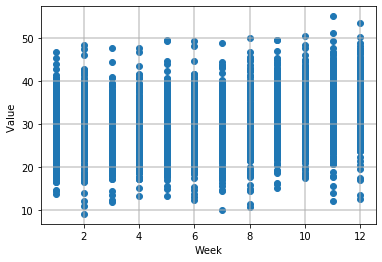

In [182]:
plt.scatter(df['Week'],df['Value'])
plt.xlabel('Week')
plt.ylabel('Value ')
plt.title("")
#Set grid line
plt.grid(linestyle='-', linewidth=2, alpha = 0.5)

#Save the plotted figure as .pngs
#plt.savefig("../Images/Latitude vs Humidity.png")

plt.show()

In [174]:
df["Depressive"]["Anxiety"]

KeyError: 'Depressive'

In [147]:
# df["Depressive"]=(df["Indicator"]=="Symptoms of Depressive Disorder").astype(int)
# df

df["Indicator"].mask(df["Indicator"]=="Symptoms of Depressive Disorder",1) 
# df["Anxiety"]= df["Indicator"].mask(df["Indicator"]=="Symptoms of Anxiety Disorder",2)
# df["Depressive or Anxiety"]= ["Indicator"].mask(df["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder",3)

#data_df["mean_radius"] = (data_df["mean radius"] <= 12.0).astype(int)

0                                                       1
1                                                       1
2                                                       1
3                                                       1
4                                                       1
                              ...                        
2515    Symptoms of Anxiety Disorder or Depressive Dis...
2516    Symptoms of Anxiety Disorder or Depressive Dis...
2517    Symptoms of Anxiety Disorder or Depressive Dis...
2518    Symptoms of Anxiety Disorder or Depressive Dis...
2519    Symptoms of Anxiety Disorder or Depressive Dis...
Name: Indicator, Length: 2520, dtype: object

In [59]:
Depressive_Indicator=df.loc[df["Indicator"]== "Symptoms of Depressive Disorder"]
Indicator

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2375,Symptoms of Depressive Disorder,By State,Virginia,Virginia,12,July 16 - July 21,27.0,23.4,30.9,23.4 - 30.9,26.0-29.3
2376,Symptoms of Depressive Disorder,By State,Washington,Washington,12,July 16 - July 21,32.2,27.8,36.9,27.8 - 36.9,29.4-32.2
2377,Symptoms of Depressive Disorder,By State,West Virginia,West Virginia,12,July 16 - July 21,28.0,22.8,33.7,22.8 - 33.7,26.0-29.3
2378,Symptoms of Depressive Disorder,By State,Wisconsin,Wisconsin,12,July 16 - July 21,23.9,20.1,28.0,20.1 - 28.0,20.5-25.9


In [60]:
Anxiety_Indicator=df.loc[df["Indicator"]== "Symptoms of Anxiety Disorder or Depressive Disorder"]
Anxiety_Indicator

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
140,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,1,Apr 23 - May 5,35.9,35.0,36.8,35.0 - 36.8,NaN
141,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,18 - 29 years,1,Apr 23 - May 5,46.8,44.3,49.3,44.3 - 49.3,NaN
142,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,30 - 39 years,1,Apr 23 - May 5,39.6,37.7,41.5,37.7 - 41.5,NaN
143,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,40 - 49 years,1,Apr 23 - May 5,38.9,37.2,40.7,37.2 - 40.7,NaN
144,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,50 - 59 years,1,Apr 23 - May 5,35.8,34.0,37.7,34.0 - 37.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2515,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,12,July 16 - July 21,38.3,34.0,42.7,34.0 - 42.7,37.2-40.5
2516,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,12,July 16 - July 21,43.8,39.3,48.5,39.3 - 48.5,43.6-50.2
2517,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,12,July 16 - July 21,37.0,31.4,42.8,31.4 - 42.8,31.8-37.1
2518,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,12,July 16 - July 21,33.3,28.9,37.9,28.9 - 37.9,31.8-37.1


In [65]:
#create dataframe to hold the data by Age
age_df = df.loc[df['Group']=='By Age']
age_df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,Apr 23 - May 5,18.4,17.0,19.7,17.0 - 19.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2453,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,40 - 49 years,12,July 16 - July 21,44.5,42.4,46.5,42.4 - 46.5,NaN
2454,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,50 - 59 years,12,July 16 - July 21,40.0,38.2,41.9,38.2 - 41.9,NaN
2455,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,60 - 69 years,12,July 16 - July 21,32.1,30.3,34.0,30.3 - 34.0,NaN
2456,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,70 - 79 years,12,July 16 - July 21,24.3,21.9,26.8,21.9 - 26.8,NaN


In [184]:
 # create dataframe to hold the data by State
state_df = df.loc[df['Group']=='By State']
state_df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
19,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1,Apr 23 - May 5,18.6,14.6,23.1,14.6 - 23.1,16.5 - 20.7
20,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1,Apr 23 - May 5,19.2,16.8,21.8,16.8 - 21.8,16.5 - 20.7
21,Symptoms of Depressive Disorder,By State,Arizona,Arizona,1,Apr 23 - May 5,22.4,19.4,25.5,19.4 - 25.5,22.2 - 24.0
22,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,1,Apr 23 - May 5,26.6,22.3,31.3,22.3 - 31.3,24.1 - 28.7
23,Symptoms of Depressive Disorder,By State,California,California,1,Apr 23 - May 5,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7
...,...,...,...,...,...,...,...,...,...,...,...
2515,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,12,July 16 - July 21,38.3,34.0,42.7,34.0 - 42.7,37.2-40.5
2516,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,12,July 16 - July 21,43.8,39.3,48.5,39.3 - 48.5,43.6-50.2
2517,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,12,July 16 - July 21,37.0,31.4,42.8,31.4 - 42.8,31.8-37.1
2518,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,12,July 16 - July 21,33.3,28.9,37.9,28.9 - 37.9,31.8-37.1


In [107]:

# new_state_df=len(state_df['State'].unique().tolist())
# new_state_df
reset_state = state_df.drop_duplicates(['State'])
reset_state

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
19,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1,Apr 23 - May 5,18.6,14.6,23.1,14.6 - 23.1,16.5 - 20.7
20,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1,Apr 23 - May 5,19.2,16.8,21.8,16.8 - 21.8,16.5 - 20.7
21,Symptoms of Depressive Disorder,By State,Arizona,Arizona,1,Apr 23 - May 5,22.4,19.4,25.5,19.4 - 25.5,22.2 - 24.0
22,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,1,Apr 23 - May 5,26.6,22.3,31.3,22.3 - 31.3,24.1 - 28.7
23,Symptoms of Depressive Disorder,By State,California,California,1,Apr 23 - May 5,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7
24,Symptoms of Depressive Disorder,By State,Colorado,Colorado,1,Apr 23 - May 5,22.0,19.4,24.9,19.4 - 24.9,20.8 - 22.1
25,Symptoms of Depressive Disorder,By State,Connecticut,Connecticut,1,Apr 23 - May 5,24.4,20.1,29.1,20.1 - 29.1,24.1 - 28.7
26,Symptoms of Depressive Disorder,By State,Delaware,Delaware,1,Apr 23 - May 5,21.1,17.6,24.9,17.6 - 24.9,20.8 - 22.1
27,Symptoms of Depressive Disorder,By State,District of Columbia,District of Columbia,1,Apr 23 - May 5,26.4,22.1,31.1,22.1 - 31.1,24.1 - 28.7
28,Symptoms of Depressive Disorder,By State,Florida,Florida,1,Apr 23 - May 5,22.5,19.7,25.4,19.7 - 25.4,22.2 - 24.0


In [173]:
reset_state_df=reset_state[["Indicator","State","Value"]]
reset_state_df

,Indicator,State,Value
19,Symptoms of Depressive Disorder,Alabama,18.6
20,Symptoms of Depressive Disorder,Alaska,19.2
21,Symptoms of Depressive Disorder,Arizona,22.4
22,Symptoms of Depressive Disorder,Arkansas,26.6
23,Symptoms of Depressive Disorder,California,25.4
24,Symptoms of Depressive Disorder,Colorado,22.0
25,Symptoms of Depressive Disorder,Connecticut,24.4
26,Symptoms of Depressive Disorder,Delaware,21.1
27,Symptoms of Depressive Disorder,District of Columbia,26.4
28,Symptoms of Depressive Disorder,Florida,22.5


In [76]:
age_df = df.loc[df['Group']=='By Gender']
age_df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
8,Symptoms of Depressive Disorder,By Gender,United States,Male,1,Apr 23 - May 5,20.8,19.6,22.0,19.6 - 22.0,NaN
9,Symptoms of Depressive Disorder,By Gender,United States,Female,1,Apr 23 - May 5,26.1,25.2,27.1,25.2 - 27.1,NaN
78,Symptoms of Anxiety Disorder,By Gender,United States,Male,1,Apr 23 - May 5,26.1,24.7,27.5,24.7 - 27.5,NaN
79,Symptoms of Anxiety Disorder,By Gender,United States,Female,1,Apr 23 - May 5,35.4,34.5,36.3,34.5 - 36.3,NaN
148,Symptoms of Anxiety Disorder or Depressive Dis...,By Gender,United States,Male,1,Apr 23 - May 5,31.0,29.6,32.3,29.6 - 32.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2319,Symptoms of Depressive Disorder,By Gender,United States,Female,12,July 16 - July 21,31.3,30.2,32.4,30.2 - 32.4,NaN
2388,Symptoms of Anxiety Disorder,By Gender,United States,Male,12,July 16 - July 21,32.1,30.8,33.5,30.8 - 33.5,NaN
2389,Symptoms of Anxiety Disorder,By Gender,United States,Female,12,July 16 - July 21,39.8,38.8,40.7,38.8 - 40.7,NaN
2458,Symptoms of Anxiety Disorder or Depressive Dis...,By Gender,United States,Male,12,July 16 - July 21,37.0,35.7,38.4,35.7 - 38.4,NaN


In [130]:
covid_df=pd.read_csv("data_resources/Covid_Data.csv")
covid_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200806,AK,4223.0,257349.0,NaN,42.0,NaN,NaN,NaN,2.0,...,261572,0,0,cb6042a57c94293675b4f8b2a02af69d8012d91f,0,0,0,0,0,NaN
1,20200806,AL,96592.0,643192.0,NaN,1575.0,11313.0,NaN,1211.0,NaN,...,739784,19,213,27774ad0a8fd9899b54fb5d577b1b778d3d5004f,0,0,0,0,0,NaN
2,20200806,AR,47028.0,492808.0,NaN,514.0,3118.0,NaN,NaN,111.0,...,539836,7,0,1188e9bb4b25b98410580729c252181b8d1f4dfc,0,0,0,0,0,NaN
3,20200806,AS,0.0,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1396,0,0,5c33616b07ca7687fdea8c9ea6a110cb6abea724,0,0,0,0,0,NaN
4,20200806,AZ,183647.0,812217.0,NaN,1879.0,14068.0,593.0,NaN,427.0,...,995864,70,509,b9e494d4ce7ec7f1188ac5a7b72643b596000d1d,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,20200126,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,7acb526e14f20a29cc74a0b32a37328bc6eac6c2,0,0,0,0,0,NaN
8637,20200125,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,9b52ca94dd2a996822542ea5f17a7363e7ad91cf,0,0,0,0,0,NaN
8638,20200124,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,094154f68e74bfc30b977cdee888f9c07be4360e,0,0,0,0,0,NaN
8639,20200123,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,e16af2a6a8f060355ff5ba499a28309a262c0b1e,0,0,0,0,0,NaN


In [131]:
new_covid_df=covid_df[["state","positive","negative"]]
new_covid_df.dropna()
#new_covid_df.sort_values("positive", ascending=True)

,state,positive,negative
0,AK,4223.0,257349.0
1,AL,96592.0,643192.0
2,AR,47028.0,492808.0
3,AS,0.0,1396.0
4,AZ,183647.0,812217.0
...,...,...,...
8636,WA,2.0,0.0
8637,WA,2.0,0.0
8638,WA,2.0,0.0
8639,WA,2.0,0.0


In [136]:
covid_group=new_covid_df.groupby(["positive"])
covid_group.head()

,state,positive,negative
0,AK,4223.0,257349.0
1,AL,96592.0,643192.0
2,AR,47028.0,492808.0
3,AS,0.0,1396.0
4,AZ,183647.0,812217.0
...,...,...,...
8609,WA,106.0,0.0
8610,WA,93.0,0.0
8611,WA,82.0,0.0
8613,WA,59.0,0.0
